<a href="https://colab.research.google.com/github/AngeMervaneJdev/ML_AI_1/blob/main/RFegressionMultivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chargement des données

utilisation de la librairie Pandas

le ficher est téléchargeable ici [Multivariate_Linear_Regression_dataset](https://github.com/AngeMervane1Jdev/regressionMultivariate/blob/master/Multivariate_Linear_Regression_dataset.xlsx)

In [ ]:
import pandas as pd
df = pd.read_csv("newData.csv")
print(df)

In [ ]:
print(df.head())

# Séparation des données

In [ ]:
# Récupérer l'ensemble des valeurs de la variable cible
Y = df["prix"]
# Récupérer les variables prédictives (on en a 2)
X = df[['taille_en_pieds_carre','nb_chambres']]
print(Y)
print(X)

# Représentation des données

Pour mieux comprendre les données, il est souvent utile de les visualiser. Ici, nous avons un jeu de données de 3 dimensions. Nos données seront éparpillées dans un espace 3D (chaque ligne du dataset sera un couple (x,y,z)). On peut représenter les données dans un espace 3D avec la librairie matplotlib :

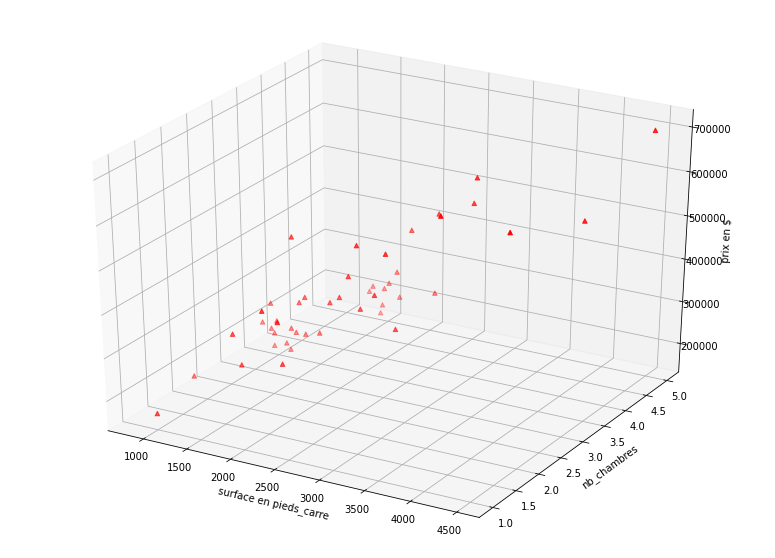

In [35]:
import matplotlib.pyplot as plt
 
fig =plt.figure(figsize=(30,10))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(df["taille_en_pieds_carre"], df["nb_chambres"], df["prix"], c='r', marker='^')
 
ax.set_xlabel('surface en pieds_carre')
ax.set_ylabel('nb_chambres')
ax.set_zlabel('prix en $')
 
plt.show()
plt.clf()
plt.close()

# Normalisation des données et feature Scaling

La librairie Scikit learn de Python propose plusieurs classes et méthodes pour faire de la préparation de données (Data pre-processing) pour les algorithmes de Machine Learning. Le package sklearn.preprocessing propose la classe StandardScaler qui permettra de faire du features scaling sur toutes nos variables prédictives.

In [ ]:
from sklearn.preprocessing import StandardScaler
 
scale = StandardScaler()
X_scaled = scale.fit_transform(X[['taille_en_pieds_carre', 'nb_chambres']])
print(X_scaled)

#Apprentissage de l’algorithme par les données
 tous les ingrédients sont là pour pouvoir appliquer notre algorithme de régression linéaire multivariée.  Parmi les procédés mathématiques pour faire de la régression linéaire, il y a le Ordinary Least Squares (OLS). 
  OLS est une méthode pour estimer une variable cible dans un modèle de régression linéaire. Pour y parvenir, OLS va minimiser la somme des carrés des différences entre les réponses observées (de notre Training Set) et ceux prédits par la fonction linéaire appliquée à nos variables prédictives de notre ensemble de données.

In [23]:
import statsmodels.api as sm
est = sm.OLS(Y, X).fit()
 
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                   prix   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              631.4
Date:                Thu, 03 Feb 2022   Prob (F-statistic):                    1.19e-33
Time:                        19:24:25   Log-Likelihood:                         -589.11
No. Observations:                  47   AIC:                                      1182.
Df Residuals:                      45   BIC:                                      1186.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

#Visualisation de la fonction de prédiction

On dispose maintenant de notre modèle prédictif, nous pourrons réutiliser notre training Set pour “dessiner” la fonction prédictive qu’on a obtenu. Vu qu’on dispose d’un ensemble de données de 3 dimensions, la fonction obtenue sera également définie dans un espace 3D. Pour rappel, notre fonction prédictive est définie comme suit :

    prix_estimé = F(superficie, nb_chambres) = ε + α * superficie + β * nb_chambres

Nous pourrons appliquer cette fonction sur les données qu’on a utilisées pour l’entrainement d’OLS, pour obtenir un ensemble de prédictions de prix :

In [24]:
def predict_price_of_house(taille_maison, nb_chambre):
    return 140.8611 * taille_maison + 1.698e+04 * nb_chambre

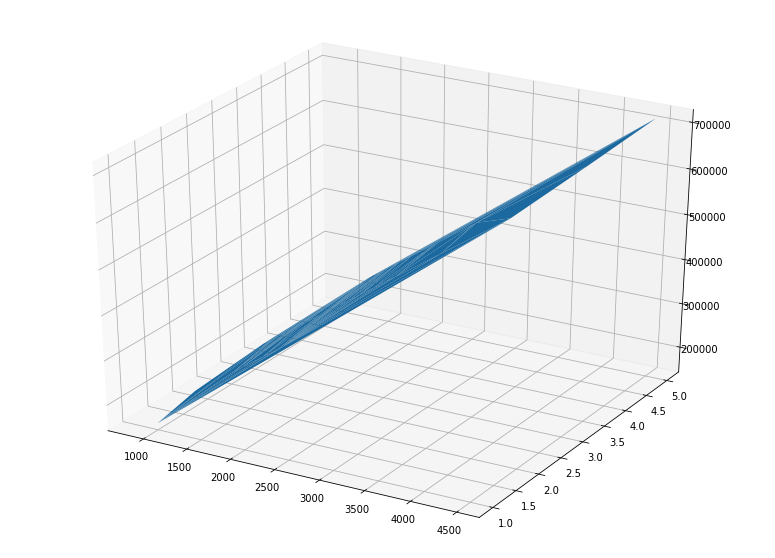

In [43]:
import matplotlib.pyplot as plt
def predict_all(lst_sizes, lst_nb_chmbres):
    predicted_prices = []
    for n in range(0, len(Y)):
        predicted_prices.append(predict_price_of_house(lst_sizes[n], lst_nb_chmbres[n]))
    return predicted_prices

fig =plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 2, 2, projection='3d')
 
ax.plot_trisurf(df["taille_en_pieds_carre"], df["nb_chambres"], predict_all(df["taille_en_pieds_carre"], df["nb_chambres"]))
 
plt.show()

#Test de prédiction

Nous pourrons utiliser notre modèle prédictif pour prédire le prix d’une maison qui n’est pas présente dans notre jeu de données. Estimons, le prix d’une maison avec 4500 pieds² et avec 5 chambres :

In [30]:
print(predict_price_of_house(4500,5))

718774.95
